In [2]:
import anndata
import os

# Load the .h5ad file (replace with your filename)
input_file = os.path.join('data', 'dataset.h5ad')
adata = anndata.read_h5ad(input_file)

# Basic info
print(adata)
print("Shape:", adata.shape)

# Show first few rows of observations and variables
print("Observations (obs):")
print(adata.obs.head())

print("Variables (var):")
print(adata.var.head())

# List available layers
print("Layers:", list(adata.layers.keys()))

# List obs and var columns
print("Obs columns:", adata.obs.columns.tolist())
print("Var columns:", adata.var.columns.tolist())

AnnData object with n_obs × n_vars = 3460 × 13565
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes', 'size_factors'
    var: 'feature_id', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'feature_name'
    uns: 'dataset_description', 'dataset_id', 'dataset_name', 'dataset_organism', 'dataset_reference', 'dataset_summary', 'dataset_url', 'normalization_id', 'spatial'
    obsm: 'spatial'
    layers: 'counts', 'normalized'
Shape: (3460, 13565)
Observations (obs):
                    in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               4112   
AAACAATCTACTAGCA-1          1          3         43         

In [3]:
# read  the counts layer
counts = adata.layers['counts']
print("Counts layer:")
print(counts.shape)


Counts layer:
(3460, 13565)


In [4]:
# show counts layer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert counts to a DataFrame for easier manipulation
counts_df = pd.DataFrame(counts.toarray(), index=adata.obs_names, columns=adata.var_names)
# Display the first few rows of the counts DataFrame
print("Counts DataFrame:")
counts_df.head()

Counts DataFrame:


gene_ids,ENSG00000187634,ENSG00000188976,ENSG00000187961,ENSG00000187583,ENSG00000188290,ENSG00000187608,ENSG00000188157,ENSG00000131591,ENSG00000186891,ENSG00000186827,...,ENSG00000155962,ENSG00000185973,ENSG00000168939,ENSG00000124333,ENSG00000067646,ENSG00000092377,ENSG00000114374,ENSG00000067048,ENSG00000154620,ENSG00000012817
AAACAAGTATCTCCCA-1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
AAACAATCTACTAGCA-1,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,5.0
AAACACCAATAACTGC-1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
AAACAGAGCGACTCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
AAACAGCTTTCAGAAG-1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
counts_df.columns

Index(['ENSG00000187634', 'ENSG00000188976', 'ENSG00000187961',
       'ENSG00000187583', 'ENSG00000188290', 'ENSG00000187608',
       'ENSG00000188157', 'ENSG00000131591', 'ENSG00000186891',
       'ENSG00000186827',
       ...
       'ENSG00000155962', 'ENSG00000185973', 'ENSG00000168939',
       'ENSG00000124333', 'ENSG00000067646', 'ENSG00000092377',
       'ENSG00000114374', 'ENSG00000067048', 'ENSG00000154620',
       'ENSG00000012817'],
      dtype='object', name='gene_ids', length=13565)

In [6]:
# convert observations to a DataFrame
obs_df = adata.obs.copy()

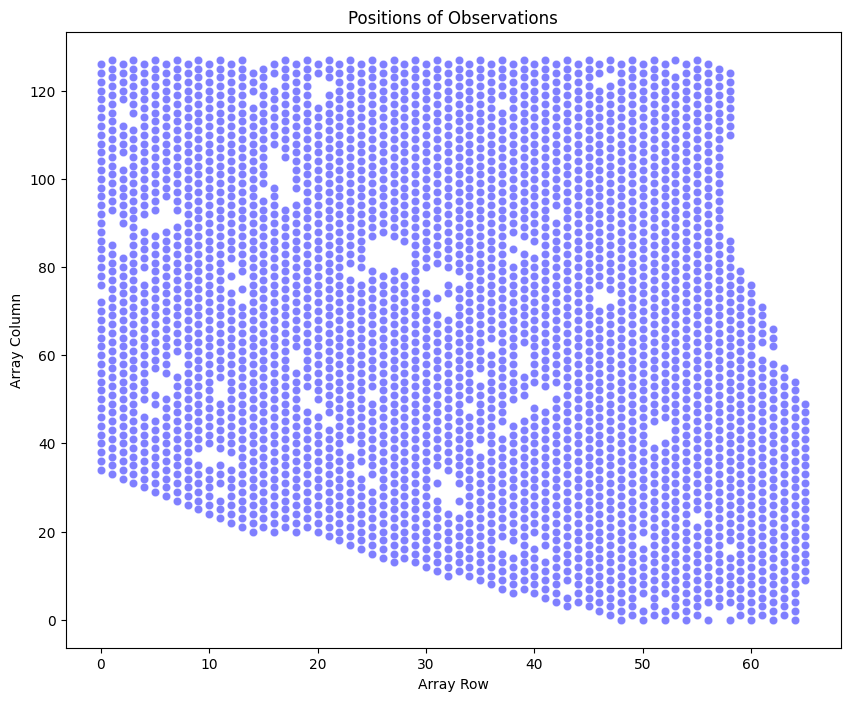

In [7]:
# plot positions of the experssions in observations using array_row and array_col in obs_df
plt.figure(figsize=(10, 8))
sns.scatterplot(data=obs_df, x='array_row', y='array_col', color='blue', alpha=0.5)
plt.title('Positions of Observations')
plt.xlabel('Array Row')
plt.ylabel('Array Column')
plt.show()


In [8]:
#Join the counts_df with obs_df
joined_df = obs_df.join(counts_df, how='inner')
# Display the first few rows of the joined DataFrame
print("Joined DataFrame:")
joined_df.head()

Joined DataFrame:


,in_tissue,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,...,ENSG00000155962,ENSG00000185973,ENSG00000168939,ENSG00000124333,ENSG00000067646,ENSG00000092377,ENSG00000114374,ENSG00000067048,ENSG00000154620,ENSG00000012817
AAACAAGTATCTCCCA-1,1,50,102,4112,8.321908,8211.0,9.013351,14.845938,20.557788,27.950311,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
AAACAATCTACTAGCA-1,1,3,43,7063,8.862767,21905.0,9.994515,13.558548,18.237845,24.807122,...,1.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,5.0
AAACACCAATAACTGC-1,1,59,19,2961,7.993620,4987.0,8.514791,15.299779,21.195107,29.256066,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
AAACAGAGCGACTCCT-1,1,14,94,3110,8.042699,5575.0,8.626227,15.838565,21.739910,29.524664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
AAACAGCTTTCAGAAG-1,1,43,9,5010,8.519391,10090.0,9.219399,11.585728,16.253717,22.983152,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
# create data frame from the counts_df where the value is the column name of the highest value in teh row
max_counts_df = counts_df.idxmax(axis=1)
# Display the first few rows of the max_counts DataFrame
print("Max Counts DataFrame:")
type(max_counts_df)
#convert to a DataFrame
max_counts_df = pd.DataFrame(max_counts_df, columns=['max_gene'])
max_counts_df.head()

Max Counts DataFrame:


,max_gene
AAACAAGTATCTCCCA-1,ENSG00000150991
AAACAATCTACTAGCA-1,ENSG00000142515
AAACACCAATAACTGC-1,ENSG00000107317
AAACAGAGCGACTCCT-1,ENSG00000107796
AAACAGCTTTCAGAAG-1,ENSG00000150991


In [10]:
#join the max_counts_df with obs_df
joined_max_counts_df = obs_df.join(max_counts_df, how='inner')
# Display the first few rows of the joined DataFrame
print("Joined Max Counts DataFrame:")
joined_max_counts_df.head()

Joined Max Counts DataFrame:


,in_tissue,array_row,array_col,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_genes,size_factors,max_gene
AAACAAGTATCTCCCA-1,1,50,102,4112,8.321908,8211.0,9.013351,14.845938,20.557788,27.950311,41.480940,4112,8196.0,ENSG00000150991
AAACAATCTACTAGCA-1,1,3,43,7063,8.862767,21905.0,9.994515,13.558548,18.237845,24.807122,36.986989,7063,21879.0,ENSG00000142515
AAACACCAATAACTGC-1,1,59,19,2961,7.993620,4987.0,8.514791,15.299779,21.195107,29.256066,44.114698,2961,4976.0,ENSG00000107317
AAACAGAGCGACTCCT-1,1,14,94,3110,8.042699,5575.0,8.626227,15.838565,21.739910,29.524664,44.430493,3110,5567.0,ENSG00000107796
AAACAGCTTTCAGAAG-1,1,43,9,5010,8.519391,10090.0,9.219399,11.585728,16.253717,22.983152,36.283449,5010,10066.0,ENSG00000150991


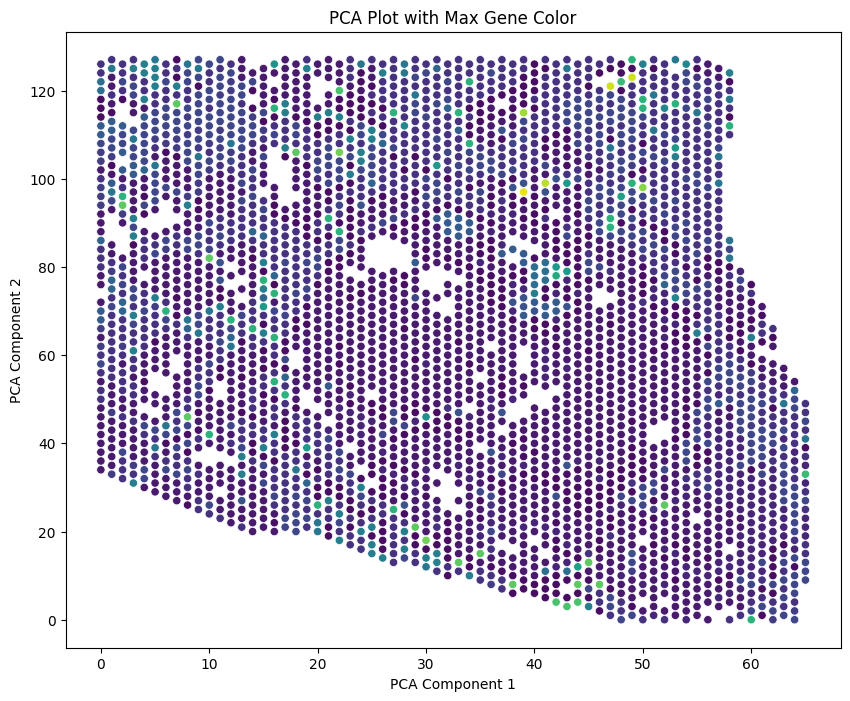

In [11]:
# plot chart with x as array_row, y as array_col and color as max_gene
plt.figure(figsize=(10, 8))
sns.scatterplot(data=joined_max_counts_df, x='array_row', y='array_col', hue='max_gene', palette='viridis', legend=None)
plt.title('PCA Plot with Max Gene Color')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

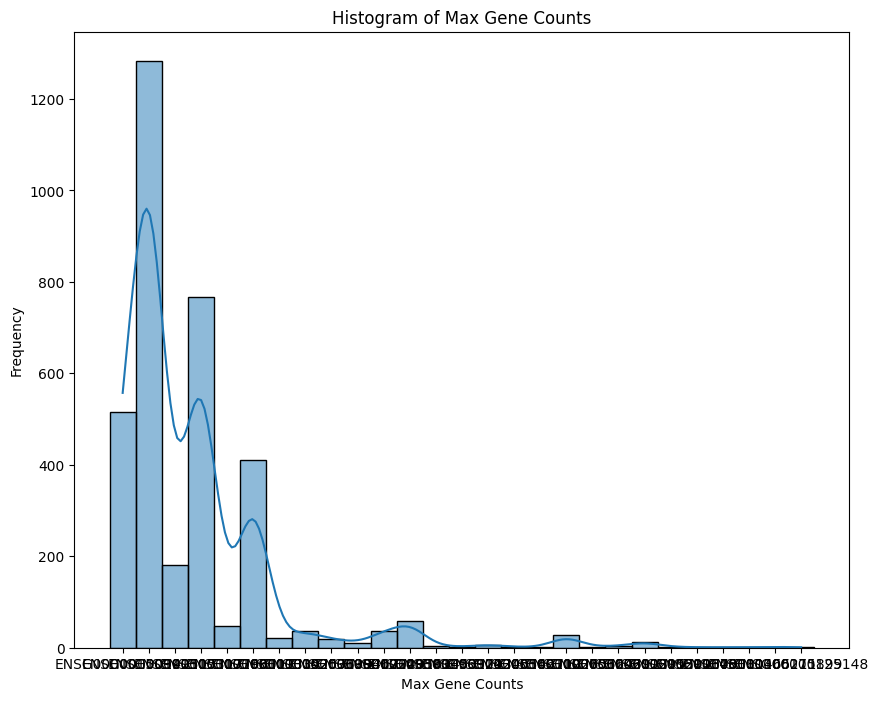

In [12]:
# histogram of the max gene counts
plt.figure(figsize=(10, 8))
sns.histplot(data=joined_max_counts_df, x='max_gene', bins=30, kde=True)
plt.title('Histogram of Max Gene Counts')
plt.xlabel('Max Gene Counts')
plt.ylabel('Frequency')
plt.show()


In [13]:
# find the top 10 genes with the highest counts
top_genes = counts_df.sum(axis=0).nlargest(10)
# Display the top 10 genes
print("Top 10 Genes with Highest Counts:")
print(top_genes)

Top 10 Genes with Highest Counts:
gene_ids
ENSG00000142515    467281.0
ENSG00000014257    298088.0
ENSG00000150991    267157.0
ENSG00000107796    193015.0
ENSG00000101335    187140.0
ENSG00000167751    183211.0
ENSG00000075624    172753.0
ENSG00000263639    148996.0
ENSG00000149591    141297.0
ENSG00000205542    136050.0
dtype: float32


In [14]:
# find the names of the top 10 genes
top_genes_names = top_genes.index.tolist()
# Display the names of the top 10 genes
print("Top 10 Genes Names:")
print(top_genes_names)

Top 10 Genes Names:
['ENSG00000142515', 'ENSG00000014257', 'ENSG00000150991', 'ENSG00000107796', 'ENSG00000101335', 'ENSG00000167751', 'ENSG00000075624', 'ENSG00000263639', 'ENSG00000149591', 'ENSG00000205542']


In [15]:
# make a big df of all the data
all_data_df = joined_df.copy()

# drop columns n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_genes,size_factors
all_data_df.drop(columns=['n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
                        'log1p_total_counts', 'pct_counts_in_top_50_genes',
                        'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
                        'pct_counts_in_top_500_genes', 'n_genes', 'size_factors'], inplace=True)

all_data_df.head()

,in_tissue,array_row,array_col,ENSG00000187634,ENSG00000188976,ENSG00000187961,ENSG00000187583,ENSG00000188290,ENSG00000187608,ENSG00000188157,...,ENSG00000155962,ENSG00000185973,ENSG00000168939,ENSG00000124333,ENSG00000067646,ENSG00000092377,ENSG00000114374,ENSG00000067048,ENSG00000154620,ENSG00000012817
AAACAAGTATCTCCCA-1,1,50,102,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
AAACAATCTACTAGCA-1,1,3,43,1.0,3.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,5.0
AAACACCAATAACTGC-1,1,59,19,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
AAACAGAGCGACTCCT-1,1,14,94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
AAACAGCTTTCAGAAG-1,1,43,9,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
transformed_data_df = all_data_df.copy().drop(columns=["in_tissue"])

# create mapping of gene names to a z coordinate
gene_z_mapping = {gene: idx for idx, gene in enumerate(counts_df.columns)}

# create new df where each count is in its own cell with columns: array_row, array_col, gene, count
melted_df = transformed_data_df.melt(id_vars=['array_row', 'array_col'],
                                       var_name='gene', value_name='count')
#display the first few rows of the melted DataFrame
melted_df.head()

,array_row,array_col,gene,count
0,50,102,ENSG00000187634,1.0
1,3,43,ENSG00000187634,1.0
2,59,19,ENSG00000187634,0.0
3,14,94,ENSG00000187634,0.0
4,43,9,ENSG00000187634,0.0


In [17]:
gene_z_mapping

{'ENSG00000187634': 0,
 'ENSG00000188976': 1,
 'ENSG00000187961': 2,
 'ENSG00000187583': 3,
 'ENSG00000188290': 4,
 'ENSG00000187608': 5,
 'ENSG00000188157': 6,
 'ENSG00000131591': 7,
 'ENSG00000186891': 8,
 'ENSG00000186827': 9,
 'ENSG00000078808': 10,
 'ENSG00000176022': 11,
 'ENSG00000160087': 12,
 'ENSG00000162572': 13,
 'ENSG00000131584': 14,
 'ENSG00000169972': 15,
 'ENSG00000127054': 16,
 'ENSG00000224051': 17,
 'ENSG00000107404': 18,
 'ENSG00000162576': 19,
 'ENSG00000175756': 20,
 'ENSG00000221978': 21,
 'ENSG00000235098': 22,
 'ENSG00000179403': 23,
 'ENSG00000215915': 24,
 'ENSG00000205090': 25,
 'ENSG00000160075': 26,
 'ENSG00000197530': 27,
 'ENSG00000189409': 28,
 'ENSG00000248333': 29,
 'ENSG00000189339': 30,
 'ENSG00000215790': 31,
 'ENSG00000008130': 32,
 'ENSG00000078369': 33,
 'ENSG00000169885': 34,
 'ENSG00000178821': 35,
 'ENSG00000067606': 36,
 'ENSG00000162585': 37,
 'ENSG00000157933': 38,
 'ENSG00000116151': 39,
 'ENSG00000157916': 40,
 'ENSG00000157911': 41,
 '

In [40]:
#map the gene names to z coordinates
melted_df['z'] = melted_df['gene'].map(gene_z_mapping)
# Display the first few rows of the melted DataFrame with z coordinates
melted_df.head()
len(melted_df['z'])

46934900

In [52]:
# plot 3d scatter plot of the data only for counts greater than 0
import plotly.graph_objects as go
import plotly.express as px

# grab some random poitnts to visualize
import random

# Filter the melted DataFrame for counts greater than 0
filtered_melted_df = melted_df[melted_df['count'] > 2]

# Randomly sample 100000 points for visualization but keep the points where gene = ENSG00000142515
filtered_melted_df = pd.concat([(filtered_melted_df[filtered_melted_df['gene'] == 'ENSG00000142515']),
    filtered_melted_df[filtered_melted_df['gene'] != 'ENSG00000142515'].sample(n=min(10000, len(filtered_melted_df)), random_state=42)])

# sampled_indices = random.sample(range(len(filtered_melted_df)), min(100000, len(filtered_melted_df)))
# filtered_melted_df = filtered_melted_df.iloc[sampled_indices]

# add number id to the DataFrame with count of 1 as id 1, 2-5 as id 2, 6-40 as id 3,  40+ as id 4
filtered_melted_df['id'] = pd.cut(filtered_melted_df['count'],
                                  bins=[0, 1, 5, 40, float('inf')],
                                  labels=[4, 3, 2, 1],
                                  right=False)


# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=filtered_melted_df['array_row'],
    y=filtered_melted_df['array_col'],
    z=filtered_melted_df['z'],
    mode='markers',
    marker=dict(
        size=2,
        color=filtered_melted_df['id'],  # Color by count
        opacity=0.8
    ),
    text=filtered_melted_df['count']  # Hover text
)])
fig.update_layout(
    title='3D Scatter Plot of Gene Counts',
    scene=dict(
        xaxis_title='Array Row',
        yaxis_title='Array Column',
        zaxis_title='Gene (Z Coordinate)'
    ),
    width=800,
    height=800
)
fig.show()


In [ ]:
# plot 3d scatter plot of the data only for counts greater than 0
import plotly.graph_objects as go
import plotly.express as px

# grab some random poitnts to visualize
import random

# Filter the melted DataFrame for counts greater than 0
filtered_melted_df = melted_df[melted_df['count'] > 0]

# Randomly sample 10 layers (z coordinates) for visualization
sampled_z = random.sample(list(filtered_melted_df['z'].unique()), min(20, len(filtered_melted_df['z'].unique())))
filtered_melted_df = filtered_melted_df[filtered_melted_df['z'].isin(sampled_z)]


# add number id to the DataFrame with count of 1 as id 1, 2-5 as id 2, 6-40 as id 3,  40+ as id 4
filtered_melted_df['id'] = pd.cut(filtered_melted_df['count'],
                                  bins=[0, 1, 5, 40, float('inf')],
                                  labels=[4, 3, 2, 1],
                                  right=False)

# add new column for marker with form count, gene
filtered_melted_df['marker'] = filtered_melted_df['count'].astype(str) + ', ' + filtered_melted_df['gene']


# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=filtered_melted_df['array_row'],
    y=filtered_melted_df['array_col'],
    z=filtered_melted_df['z'],
    mode='markers',
    marker=dict(
        size=2,
        color=filtered_melted_df['id'],  # Color by count
        opacity=0.8
    ),
    text= (filtered_melted_df['marker'])  # Hover text
)])
fig.update_layout(
    title='3D Scatter Plot of Gene Counts',
    scene=dict(
        xaxis_title='Array Row',
        yaxis_title='Array Column',
        zaxis_title='Gene (Z Coordinate)'
    ),
    width=800,
    height=800
)
fig.show()


In [31]:
# find different numbers in counts
unique_counts = filtered_melted_df['count'].unique()
len(unique_counts)

41

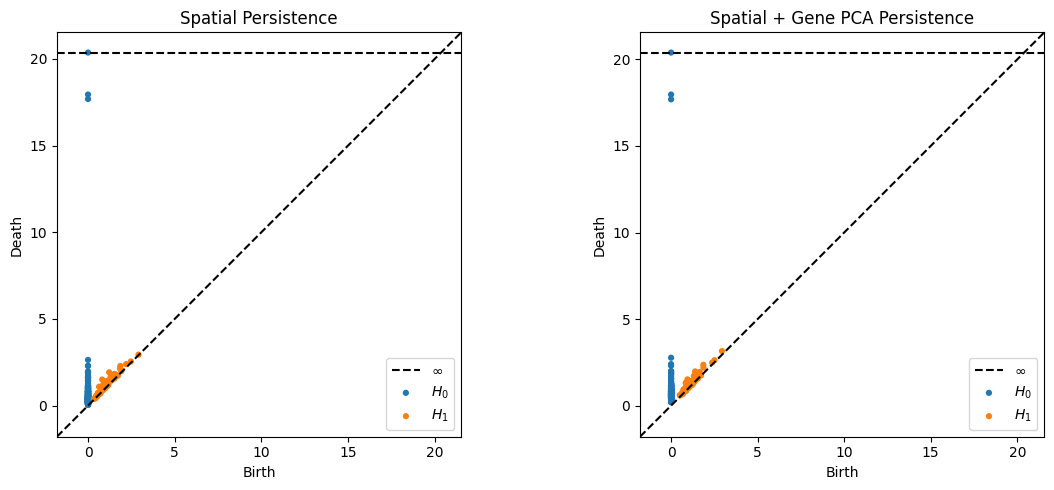

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
from sklearn.decomposition import PCA

# Step 1: Generate synthetic Xenium-like data
# Assume 300 cells with (x, y) positions and expression of 5 genes

np.random.seed(42)

# Simulate 3 spatial clusters (e.g., tissue regions)
centers = [(10, 10), (30, 30), (50, 10)]
points = []
gene_expr = []

for cx, cy in centers:
    x = np.random.normal(cx, 2, size=100)
    y = np.random.normal(cy, 2, size=100)
    g = np.random.rand(100, 5) + np.array([cx/50, cy/50, 0.2, 0.4, 0.6])  # expression depends on location
    points.append(np.stack([x, y], axis=1))
    gene_expr.append(g)

spatial_coords = np.concatenate(points, axis=0)
gene_expr = np.concatenate(gene_expr, axis=0)

# Step 2: Optionally apply PCA on gene expression
pca = PCA(n_components=2)
gene_pca = pca.fit_transform(gene_expr)

# Step 3: Combine spatial and gene PCA data (optional)
combined_data = np.hstack([spatial_coords, gene_pca])

# Step 4: Compute persistent homology on spatial coordinates
result_spatial = ripser(spatial_coords)
result_combined = ripser(combined_data)

# Step 5: Plot the persistence diagrams
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].set_title("Spatial Persistence")
plot_diagrams(result_spatial["dgms"], show=False, ax=axs[0])

axs[1].set_title("Spatial + Gene PCA Persistence")
plot_diagrams(result_combined["dgms"], show=False, ax=axs[1])

plt.tight_layout()
plt.show()


In [5]:
gene_expr

array([[1.07737307, 0.94076862, 0.89701574, 1.10248408, 0.95949115],
       [0.49359184, 1.00936116, 1.01011339, 1.26707232, 1.51324055],
       [0.7113424 , 0.70151629, 0.99829518, 1.04996393, 1.30196688],
       ...,
       [1.114933  , 0.29385728, 1.10962682, 1.06920026, 1.4292868 ],
       [1.8789789 , 0.77177235, 0.71744635, 0.83042741, 0.91694659],
       [1.43459596, 0.97387966, 0.80192343, 1.29252329, 1.04338001]])

In [ ]:
# make a big df of all the data

all_data_df = pd.DataFrame(spatial_coords, columns=['x', 'y'])